In [461]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [462]:
random.seed(851928374659382)

In [463]:
# Generate random points of x and y coordinates between -50 and 50

In [464]:
coords = [[np.random.randint(-50,50), np.random.randint(-50,50)] for _ in range(1000)]

In [465]:
# Convert list to np.array
coords = np.asarray(coords)

In [466]:
coords

array([[ 28,  17],
       [ 16, -43],
       [ 27,   9],
       ...,
       [-47,  35],
       [-39,  45],
       [ 44,   9]])

In [467]:
print("Shape of original data is:",coords.shape)

Shape of original data is: (1000, 2)


In [468]:
# Step 1: Center the data around 0 by subtracting mean in each dimension

mean = np.mean(coords.T, axis=1)
center_coords = coords - mean

In [469]:
center_coords

array([[ 26.008,  16.55 ],
       [ 14.008, -43.45 ],
       [ 25.008,   8.55 ],
       ...,
       [-48.992,  34.55 ],
       [-40.992,  44.55 ],
       [ 42.008,   8.55 ]])

In [470]:
print("Shape of centered data is:", center_coords.shape)

Shape of centered data is: (1000, 2)


In [471]:
# Step 2: Calculate covariance matrix

cov_matrix = np.cov(center_coords, rowvar=False)

In [472]:
cov_matrix

array([[843.60554154, -23.47587588],
       [-23.47587588, 835.75125125]])

In [473]:
print("Shape of cov matrix should be (dxd): d = # dimensions = 2")
print("Shape of cov matrix:", cov_matrix.shape)

Shape of cov matrix should be (dxd): d = # dimensions = 2
Shape of cov matrix: (2, 2)


In [474]:
# Step 3: Calculate eigenvectors & eigenvalues

eigval, eigvec = np.linalg.eig(cov_matrix)

In [475]:
# Create a list of pairs of eigenvalues & eigenvectors

eigen_pairs = [(np.abs(eigval[i]), eigvec[:, i]) for i in range(len(eigval))]

In [476]:
# Sort pairs from high to low eigenvalues

eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [477]:
print("Make sure eigenvalues-eigenvectors pair is sorted in descending order of eigenvalues.")
for x in eigen_pairs:
    print(x[0])

Make sure eigenvalues-eigenvectors pair is sorted in descending order of eigenvalues.
863.4804806986285
815.8763120941643


In [478]:
# Step 4: Find matrix A = p x n with p principal components in row, component one on top
# Choose d eigenvectors from k eigenvalues
# Reduce 2D to 1D: k = 1
# Choose eigenvectors associated with 1st eigenvalue

A = np.array([[eigen_pairs[0][1]]]).reshape(1,2)
print("Shape of first eigenvectors matrix:", A.shape)

Shape of first eigenvectors matrix: (1, 2)


In [479]:
# Step 5: Calculate transformed data matrix T
# A is matrix with p principal components in row, component one on top
# B is tranposed centered data

B = center_coords.T
T = A.dot(B)
T = T.T
print('Shape of transformed data: ', T.shape)

Shape of transformed data:  (1000, 1)


In [480]:
max_reduced = max(T)
min_reduced = min(T)

In [481]:
# Create y = 0 coordinates of projected data
zero_y = np.zeros((1000,1))

Text(0.5, 1.0, 'Projected data')

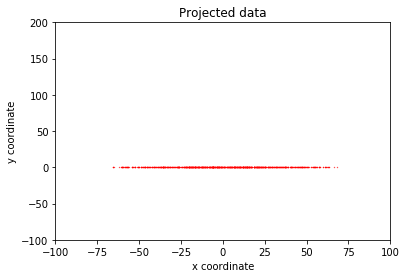

In [482]:
plt.scatter(T, zero_y[:,0],color='red', s=0.1)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.xlim(-100, 100)
plt.ylim(-100, 200)
plt.title('Projected data')

In [483]:
# Reconstruct original data from projected data
# Reconstruct = projection dot eigenvectors + mean (due to data centering)

reconstruct = T.dot(A) + mean

Text(0.5, 1.0, 'Original data by reconstruction')

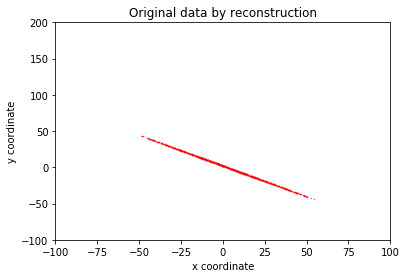

In [484]:
plt.scatter(reconstruct[:,0], reconstruct[:,1],color='red', s=0.1)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.xlim(-100, 100)
plt.ylim(-100, 200)
plt.title('Original data by reconstruction')

Text(0.5, 1.0, 'Original data')

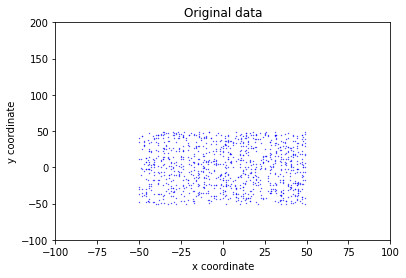

In [485]:
plt.scatter(coords[:,0], coords[:,1], color='blue', s=0.1)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.xlim(-100,100)
plt.ylim(-100,200)
plt.title('Original data')